In [23]:
import tensorflow as tf
print(f"Tensorflow v{tf.__version__}")
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Tensorflow v2.5.0-dev20210213


### Loading dataset

In [24]:
fashion_mnist = keras.datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

In [ ]:
train_images.shape

In [ ]:
train_images[0,23,23]

In [ ]:
train_labels[:10]

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

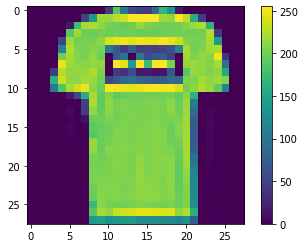

In [26]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

### Data Preprocessing

In [27]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Building the Model

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training the Model

In [30]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6352 - accuracy: 0.7794
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3799 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3372 - accuracy: 0.8746
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3135 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2871 - accuracy: 0.8948
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2778 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2655 - accuracy: 0.9024
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2519 - accuracy: 0.9061
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2410 - accuracy: 0.9099
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.232

### Evaluating the Model

In [31]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.8796
Test accuracy: 0.8795999884605408


### Making Predictions

In [32]:
predictions = model.predict(test_images)
predictions[0]

array([2.3846198e-05, 5.1143340e-10, 7.0739228e-09, 1.1870764e-09,
       7.5860747e-08, 1.1566866e-03, 9.7705276e-07, 3.6130447e-02,
       6.4073106e-08, 9.6268785e-01], dtype=float32)

In [33]:
np.argmax(predictions[0])

9

In [34]:
test_labels[0]

9

### Verifying Predictions

Pick a number: 9


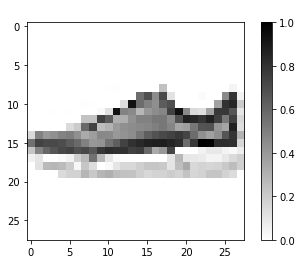

In [37]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
